In [1]:
import numpy as np
import skfuzzy as fuzz

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

[Antecedent: quality, Antecedent: service, Consequent: tip]

13.28939958501693

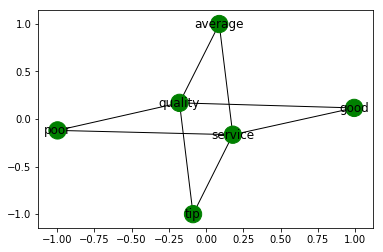

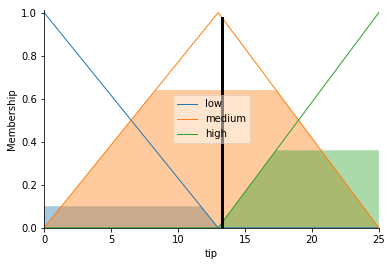

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

np.random.seed(0)

quality = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='quality')
service = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='service')
tip = ctrl.Consequent(universe=np.arange(0, 26, 1), label='tip')

quality.automf(number=3, variable_type='quality', names=[
    'poor', 'average', 'good'
])

service.automf(number=3, variable_type='quality', names=[
    'poor', 'average', 'good'
])

tip['low'] = fuzz.trimf(x=tip.universe, abc=[0, 0, 13])
tip['medium'] = fuzz.trimf(x=tip.universe, abc=[0, 13, 25])
tip['high'] = fuzz.trimf(x=tip.universe, abc=[13, 25, 25])

rule1 = ctrl.Rule(
    antecedent=quality['poor'] | service['poor'],
    consequent=tip['low'],
    label='low tip rule'
)

rule2 = ctrl.Rule(
    antecedent=service['average'],
    consequent=tip['medium'],
    label='medium tip rule'
)

rule3 = ctrl.Rule(
    antecedent=service['good'] | quality['good'],
    consequent=tip['high'],
    label='high tip rule'
)


tipping_ctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3])

tipping_ctrl.view_n()
list(tipping_ctrl.fuzzy_variables)


tipping = ctrl.ControlSystemSimulation(control_system=tipping_ctrl)
tipping.reset()
tipping.inputs({
    'quality': 4.5,
    'service': 6.8
})

tipping.compute()

# Mamdani 3 step inferente: aggregation, activation, accumulation
# tipping.compute_rule(rule1)
# tipping.print_state()

tipping.output['tip']


tip.view(sim=tipping)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f76e202aa58>)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f76dcdfb6d8>)

(<networkx.classes.digraph.DiGraph at 0x7f76dcdfb0f0>,
 [['service', 'green'],
  ['poor', 'red'],
  ['average', 'red'],
  ['good', 'green'],
  ['tip', 'green'],
  ['quality', 'green'],
  ['poor', 'red'],
  ['average', 'red'],
  ['good', 'green'],
  ['tip', 'green']])

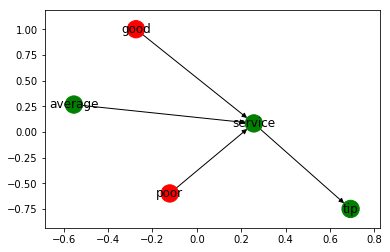

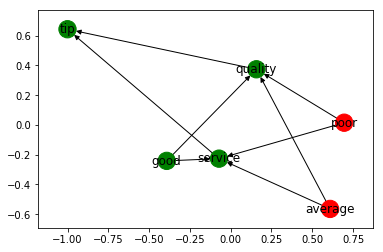

In [4]:
rule2.view_n()
rule3.view_n()
rule3.graph_n